In [27]:
import os,sys,string, time
from math import *
from array import array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import math
from matplotlib.patches import Rectangle
import joblib
from datetime import date

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Functions as Functions
import Utilities.Variables_list as Var_list
from Utilities.ipython_exit import exit

print ('Success')


Success


## Reading limit .csvs

In [28]:
samples = ["PIENU","PS191","KEK","E949"]
print("Plotting these limits: " + str(samples))
plot_dict = {}
for sample in samples:
    plot_dict[sample] = Functions.Pandafy(Constants.limit_locs[sample])

# uboone_ee_current = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL.csv')
uboone_ee_current = Functions.Pandafy('limit_files/My_limits/split_ee_150.csv')

uboone_ee_run1 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run1.csv')
uboone_ee_run3 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run3.csv')

uboone_ee_reduced = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_benchmark_r3_flashmatch_scaled.csv')

uboone_sys_split = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_benchmark_r3_flashmatch_split_test.csv')

uboone_pi0_approx = Functions.Pandafy('limit_files/My_limits/Flat_sys_havled_expected_pi0_mu_all_vars_logit_New.csv')
uboone_pi0_reduced = Functions.Pandafy('limit_files/My_limits/Flat_sys_4_bins_pi0_reduced_vars_test_2_March.csv')

Ten_event_limit = Functions.Pandafy('limit_files/My_limits/10_event_expected_mu_run3.csv')

Theorist_Pawels = Functions.Pandafy('limit_files/Reinterp_Pawels_result.csv')

T2K_recast = Functions.Pandafy('limit_files/T2K_recast_full_data.csv')

BBN = Functions.Pandafy('limit_files/BBN_Nicolo_paper.csv')

point = [150,4.26974152748967e-07]

Plotting these limits: ['PIENU', 'PS191', 'KEK', 'E949']


## Plotting limits

In [38]:
for mass in scale_dict:
    print(1/scale_dict[mass])
    
print()
for mass in scale_dict:
    print(np.sqrt(1/scale_dict[mass]))

1.0395010395010396
10.0
10.0
10.0
10.0
10.0

1.019559237857732
3.1622776601683795
3.1622776601683795
3.1622776601683795
3.1622776601683795
3.1622776601683795


1.0
0.1221156369127631
0.0009848278549373
0.0001310985484125
8.079470801246682e-06
8.687448964849439e-07
1.219240515456083e-07
1.0
8
[1.0, 0.38616355056646384, 0.0031142991247797686, 0.00041457001092535145, 2.5549530020765096e-05, 2.7472125785396293e-06, 3.855577044398951e-07, 1.0]
Warning, you are using a very rough random scaling, change to normal scaling


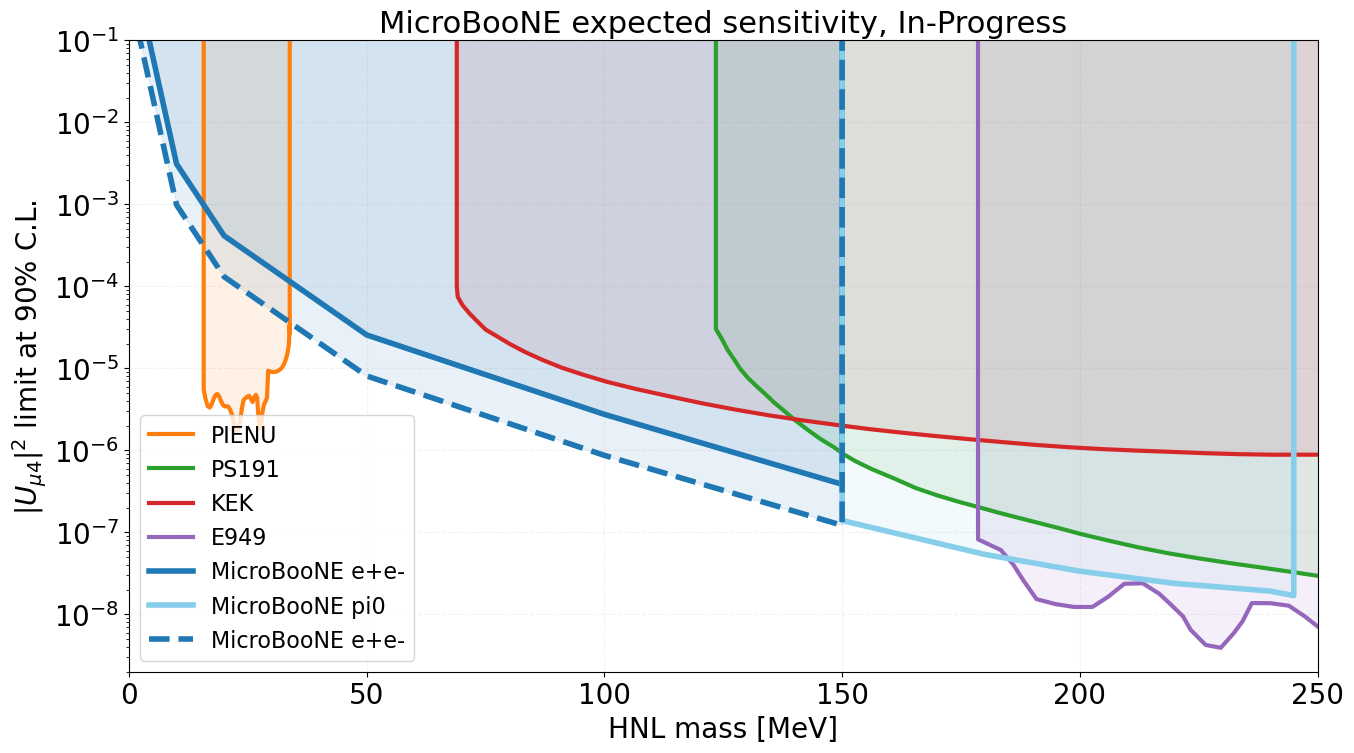

In [40]:
style_ps = '-'
style_ds = '-'
transp = 0.05

roughly_scaled = True #SHOULD USUALLY BE FALSE
scale_dict = {2:0.962,10:0.1,20:0.1,50:0.1,100:0.1,150:0.1}
corrected_uboone = [1.0]

for i, val in enumerate(uboone_ee_current['Value']):
    print(val)
    if (i!=0) and (i!=len(uboone_ee_current['Value'])-1):
        corrected_uboone.append(val*(1/np.sqrt(scale_dict[mass])))
corrected_uboone.append(1.0)

print(len(corrected_uboone))
print(corrected_uboone)

savefig = True

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)

    
# plt.plot(uboone_70percent_sys['Mass'],uboone_70percent_sys['Value'],label="MicroBooNE plus extra systematic",color="C13",lw=4)
# plt.fill_between(uboone_70percent_sys['Mass'],uboone_70percent_sys['Value'],1,color="C13",alpha=0.1)

if roughly_scaled == False:
    plt.plot(uboone_ee_current['Mass'],uboone_ee_current['Value'],label="MicroBooNE e+e-",color="C10",lw=4)
    plt.fill_between(uboone_ee_current['Mass'],uboone_ee_current['Value'],1,color="C10",alpha=0.1)
    
    plt.plot(uboone_pi0_reduced['Mass'],uboone_pi0_reduced['Value'],label="MicroBooNE pi0",color="skyblue",lw=4)
    plt.fill_between(uboone_pi0_reduced['Mass'],uboone_pi0_reduced['Value'],1,color="skyblue",alpha=0.1)
    

if roughly_scaled == True:
    print("Warning, you are using a very rough random scaling, change to normal scaling")
    plt.plot(uboone_ee_current['Mass'],corrected_uboone,label="MicroBooNE e+e-",color="C10",lw=4)
    plt.fill_between(uboone_ee_current['Mass'],corrected_uboone,1,color="C10",alpha=0.1)
    
    plt.plot(uboone_pi0_reduced['Mass'],uboone_pi0_reduced['Value'],label="MicroBooNE pi0",color="skyblue",lw=4)
    plt.fill_between(uboone_pi0_reduced['Mass'],uboone_pi0_reduced['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_ee_current['Mass'],uboone_ee_current['Value'],label="MicroBooNE e+e-",color="C10",lw=4, linestyle="dashed")
plt.fill_between(uboone_ee_current['Mass'],uboone_ee_current['Value'],1,color="C10",alpha=0.1)
    
lower_lim_BBN = np.full(101, 1e-8)

# plt.plot(BBN['Mass'],BBN['Value'], label="BBN",color="C5",lw=3)
# plt.fill_between(BBN['Mass'],BBN['Value'],1,color="C5",alpha=0.1)

# plt.plot(Theorist_Pawels['Mass'],Theorist_Pawels['Value'], label="HPS recast",color="C5",lw=3)
# plt.fill_between(Theorist_Pawels['Mass'],Theorist_Pawels['Value'],1,color="C5",alpha=0.1)

# y2=1e-8,

# plt.plot(150, 4.26974152748967e-07, marker="o",markersize=10,markeredgecolor="C13",markerfacecolor="C13", label="pi0 run1")

plt.title("MicroBooNE expected sensitivity, In-Progress")

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
# plt.ylim(1e-8,1e-3)
plt.ylim(2e-9,1e-1)
#plt.xlim(0,0.45)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left")
plt.tight_layout()

today = date.today()
d1 = today.strftime("%d_%m")

if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


## Calculating ratios of limits

In [ ]:
# plt.figure(figsize=(14,8),facecolor='white',dpi=100)

arr_50_percent = np.array(uboone_ee_current)
arr_150_percent = np.array(uboone_ee_150percent)

ratio = np.divide(arr_50_percent, arr_150_percent)
print(ratio)


In [ ]:
print(BBN['Value'])
print(type(BBN))
lower_lim = np.full(101, 1e-8)